# SINP Project - 2024

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as so
so.set_style('whitegrid')
# import plotly.express as px
# import plotly.graph_objects as go

from scipy.optimize import curve_fit

## 21.03.2024 - Malus law

## 21.03.2024 - Knife edge

## 21.03.2024 - Intensity Profile

In [3]:
df21033 = pd.read_excel('21mar2024/21mar24_expt_data_gaussian_like_fit.xlsx', sheet_name='Data_1')
display(df21033)

,Wavelength,[nm],780,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Measurement,Time [hh:mm:ss:zzz],PeakPositionX[µm],PeakPositionY[µm],CentroidPositionX[µm],CentroidPositionY[µm],ImageSat[%],TotalPower[µW],Ellipticity[%],EllipseDiameterMin[µm],EllipseDiameterMax[µm],Orientation[deg],GaussianDiameterX[µm],GaussianDiameterY[µm]
2,1,16:28:49.223000,1361.4,153,900.41,109.8,55.74,42.66,82.83,1755.63,2119.55,0,2118.24,1754.54


In [4]:
df21034 = pd.read_excel('21mar2024/21mar24_expt_data_gaussian_like_fit.xlsx', sheet_name='Data_2')
display(df21034)

,Pos X [µm],X Value [%],Pos Y [µm],Y Value [%]
0,-4500.000179,0.089609,-4498.800179,0.100459
1,-4498.800179,-0.553204,-4497.600179,0.143943
2,-4497.600179,-0.932696,-4496.400179,0.001068
3,-4496.400179,-0.204691,-4495.200179,-0.502100
4,-4495.200179,0.081864,-4494.000179,-0.179079
...,...,...,...,...
7495,4494.000179,0.105098,4495.200179,-0.402709
7496,4495.200179,0.484590,4496.400179,-0.570432
7497,4496.400179,0.422633,4497.600179,-0.849970
7498,4497.600179,-0.266649,4498.800179,-0.756790


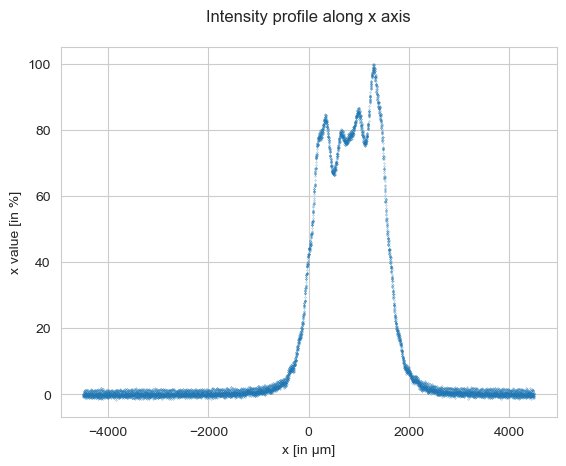

In [10]:
xpos = df21034['Pos X [µm]'].to_numpy()
xval = df21034['X Value [%]'].to_numpy()

plt.plot(xpos, xval, 'o', ms=0.2)
plt.title('Intensity profile along x axis\n')
plt.xlabel('x [in µm]')
plt.ylabel('x value [in %]')
plt.show()

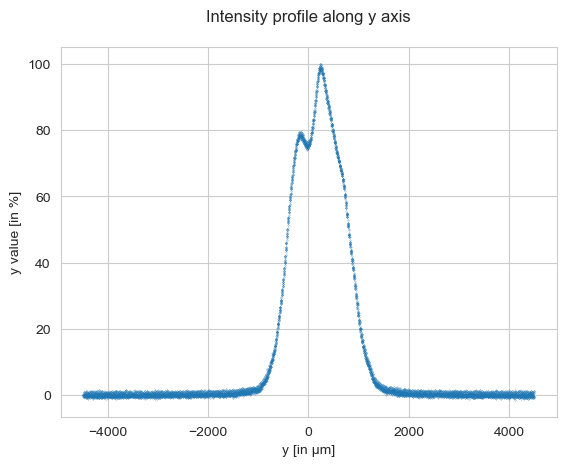

In [11]:
ypos = df21034['Pos Y [µm]'].to_numpy()
yval = df21034['Y Value [%]'].to_numpy()

plt.plot(ypos, yval, 'o', ms=0.2)
plt.title('Intensity profile along y axis\n')
plt.xlabel('y [in µm]')
plt.ylabel('y value [in %]')
plt.show()

Fitting function: Trying a Gaussian function here -
$$ f(x) = 100 \,\exp(-\frac{(x-\mu)^2}{2\sigma^2}) $$

In [7]:
def fitfn(x, mu, sig):
    return 100*np.exp(-(x-mu)**2/(2*sig))

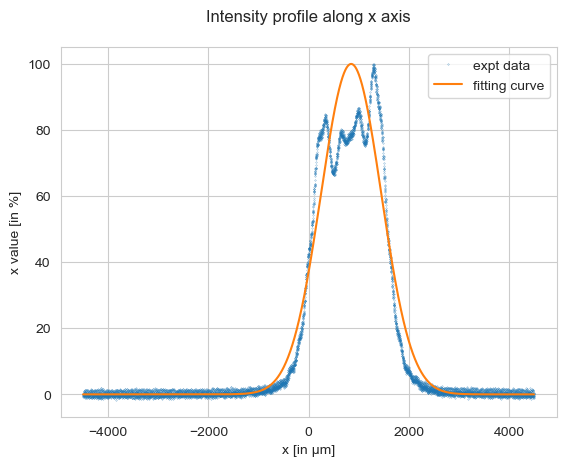

In [8]:
p_opt, p_err = curve_fit(fitfn, xpos, xval, p0=[1000, 1000])
mu1, sig1 = p_opt
plt.plot(xpos, xval, 'o', ms=0.2, label='expt data')
plt.plot(xpos, fitfn(xpos, mu1, sig1), label='fitting curve')
plt.legend()
plt.title('Intensity profile along x axis\n')
plt.xlabel('x [in µm]')
plt.ylabel('x value [in %]')
plt.show()
x_spread = sig1

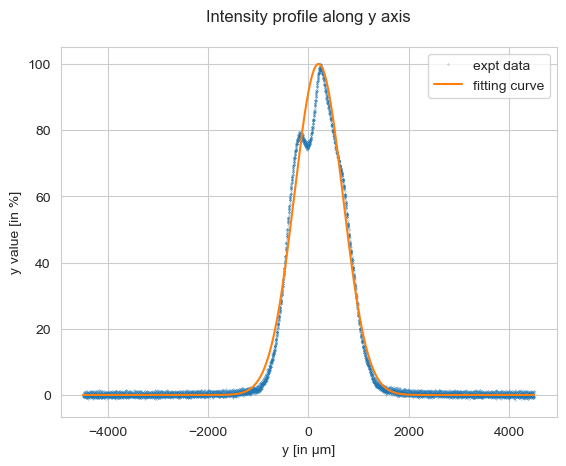

In [9]:
p_opt, p_err = curve_fit(fitfn, ypos, yval, p0=[0, 2000])
mu1, sig1 = p_opt
plt.plot(ypos, yval, 'o', ms=0.2, label='expt data')
plt.plot(ypos, fitfn(ypos, mu1, sig1), label='fitting curve')
plt.legend()
plt.title('Intensity profile along y axis\n')
plt.xlabel('y [in µm]')
plt.ylabel('y value [in %]')
plt.show()
y_spread = sig1

In [12]:
x_spread, y_spread

(362701.6774921444, 232687.8788996421)